#### Predicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Missing Value Analysis

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are no null values so its Great!!!


# Duplicates

In [5]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (303, 14)
Duplicates in dataset: 1


In [6]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (302, 14)
Duplicates in dataset: 0


# Univariate Analysis

Text(0.5, 1.0, 'Histogram of Age')

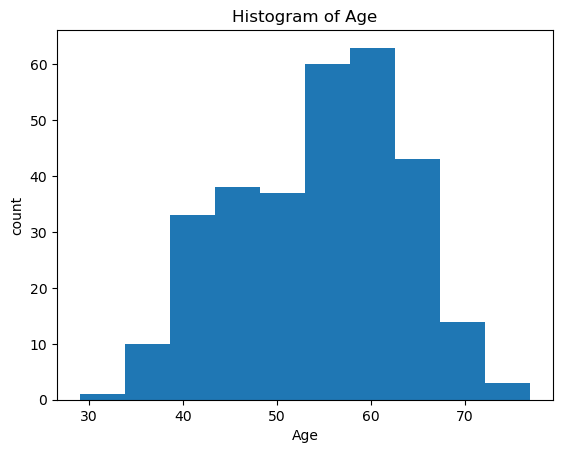

In [7]:
# just looking is histogram of age
plt.hist(df['age'],bins=10);

plt.xlabel('Age')
plt.ylabel('count')

plt.title('Histogram of Age')

<AxesSubplot:xlabel='target', ylabel='count'>

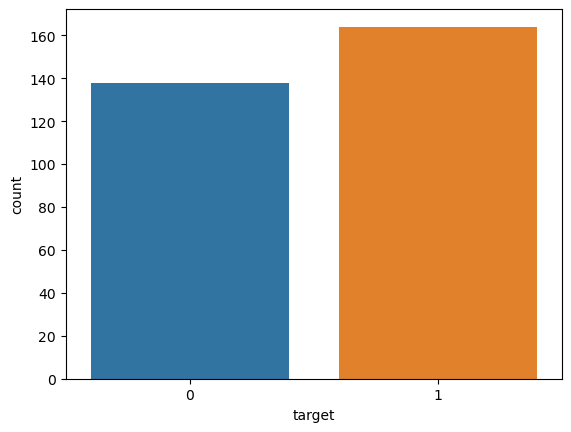

In [8]:
# Count of target Variable
sns.countplot(x=df['target'])

<AxesSubplot:xlabel='sex', ylabel='count'>

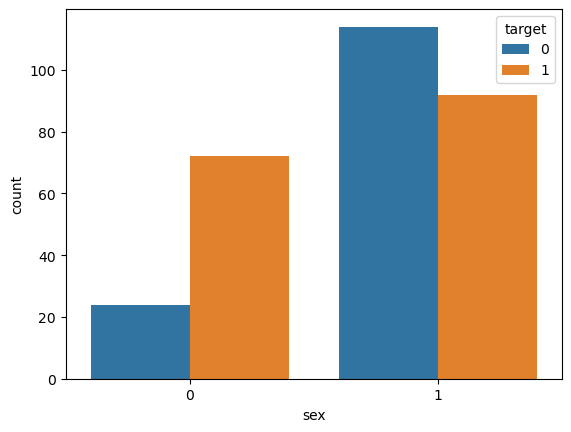

In [9]:

sns.countplot(x=df['sex'],hue=df['target'])

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
# Create the list of continuous features for further use in prepare charts
continuous_features = list(set(['age','trestbps','chol','thalach','oldpeak']))
continuous_features.sort()
continuous_features

['age', 'chol', 'oldpeak', 'thalach', 'trestbps']

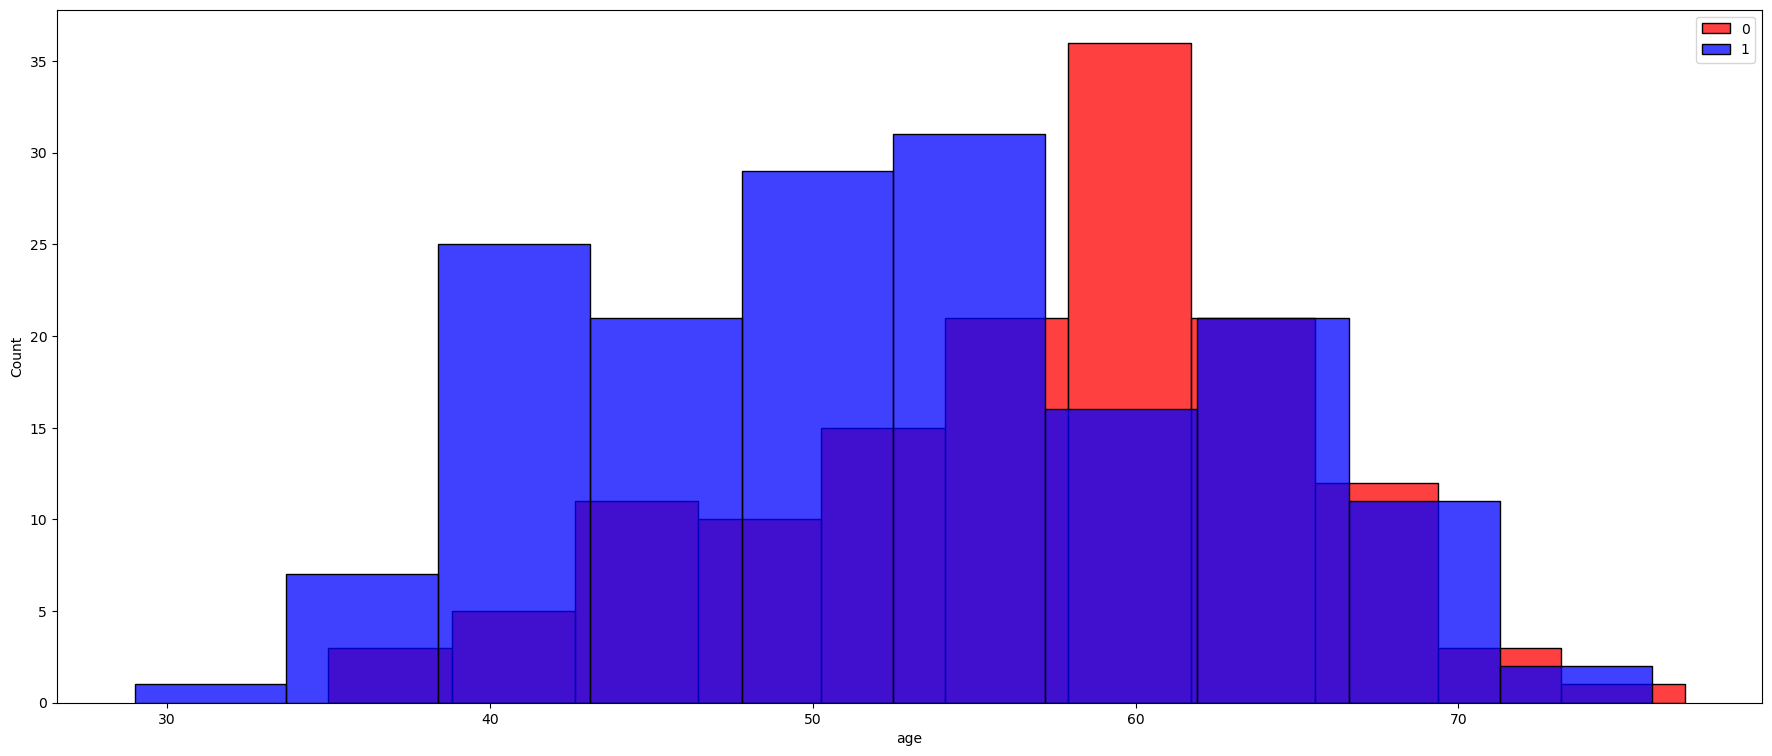

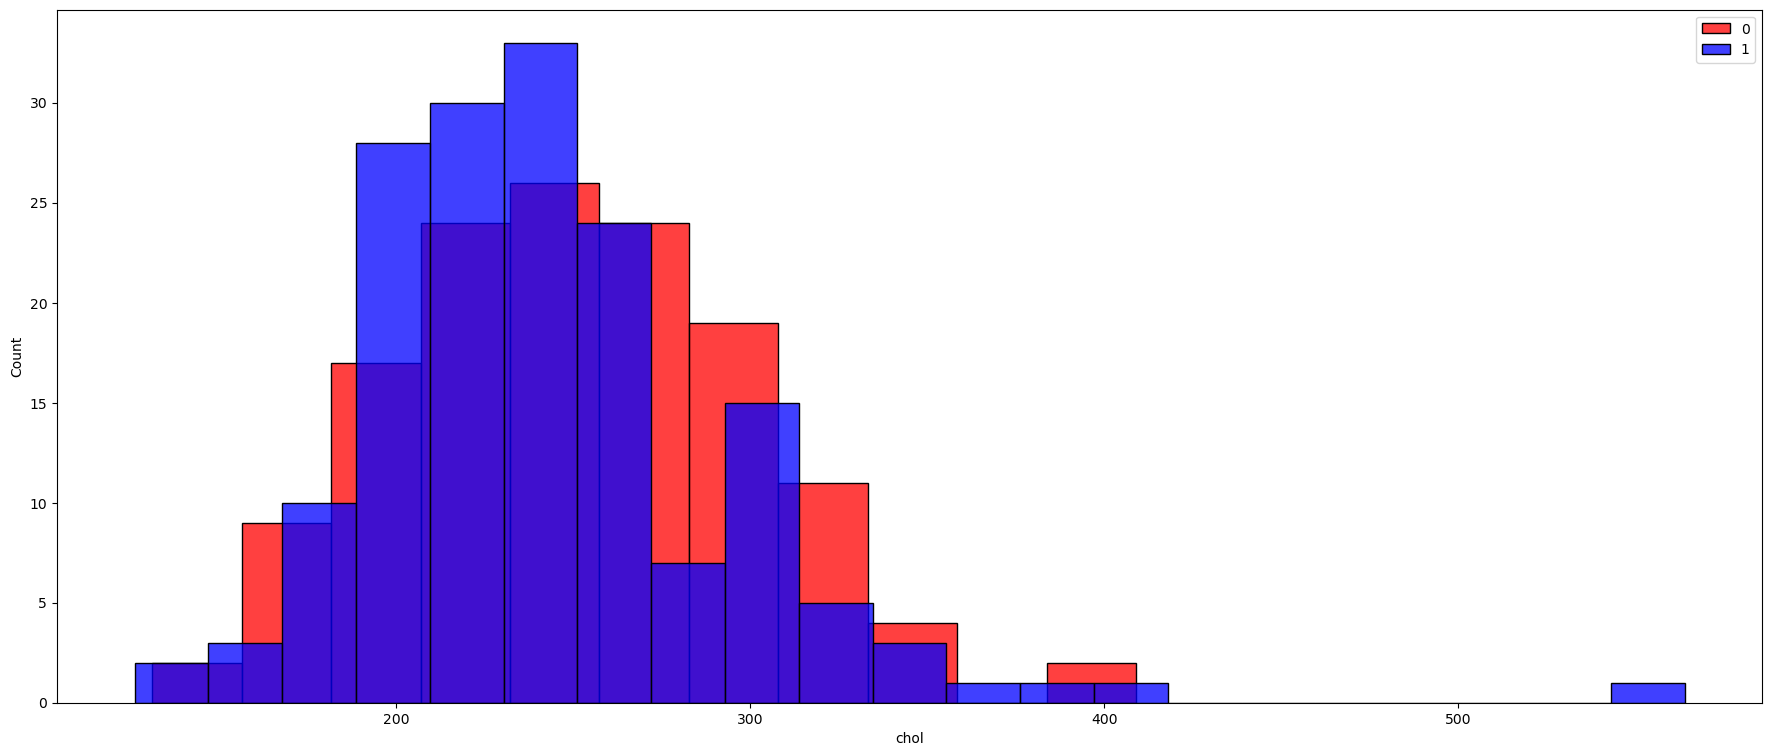

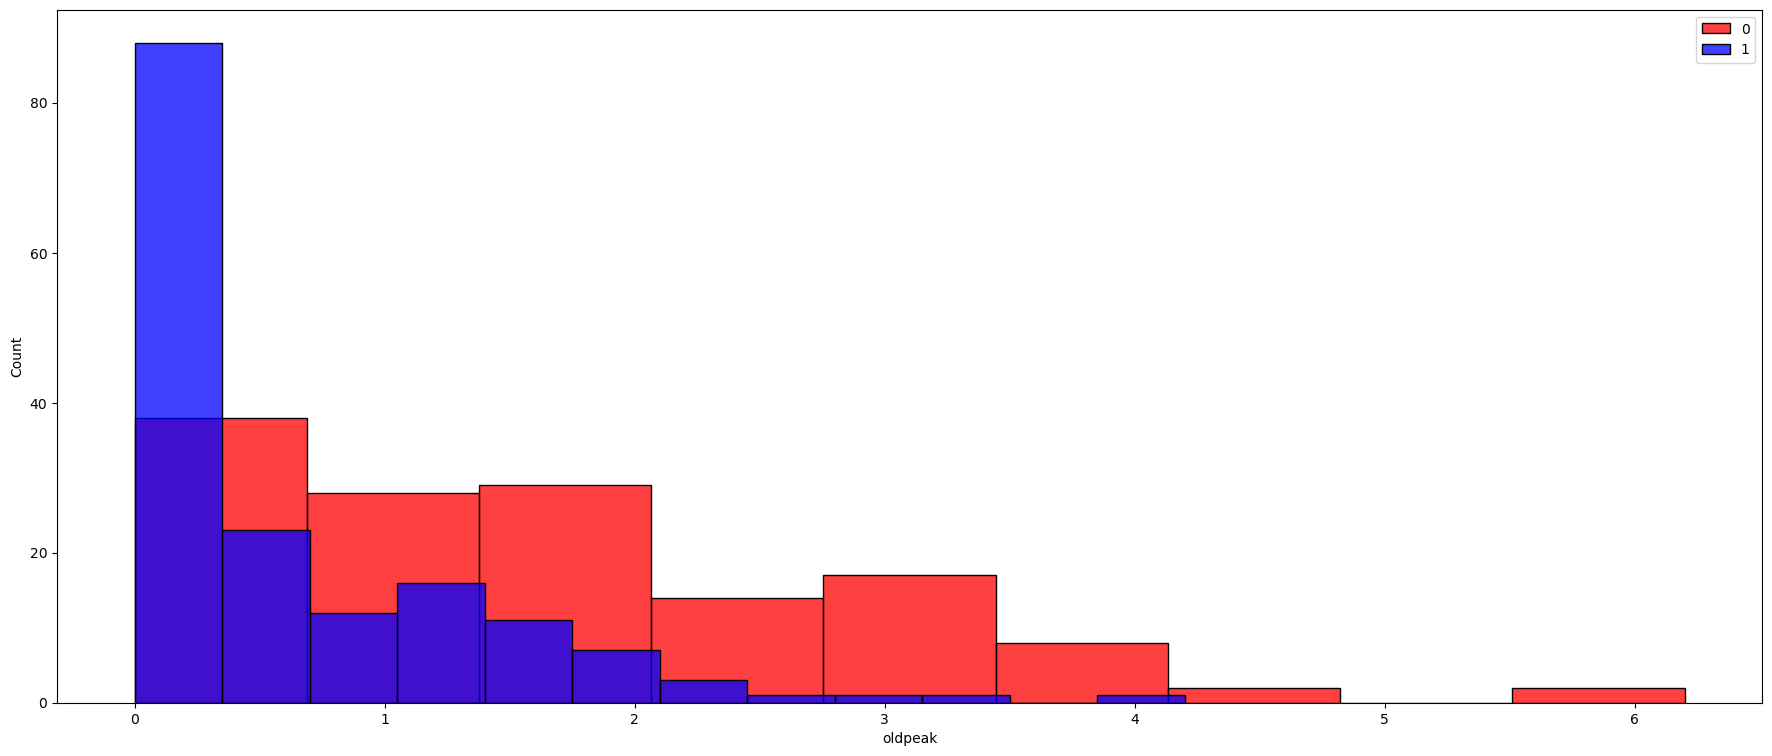

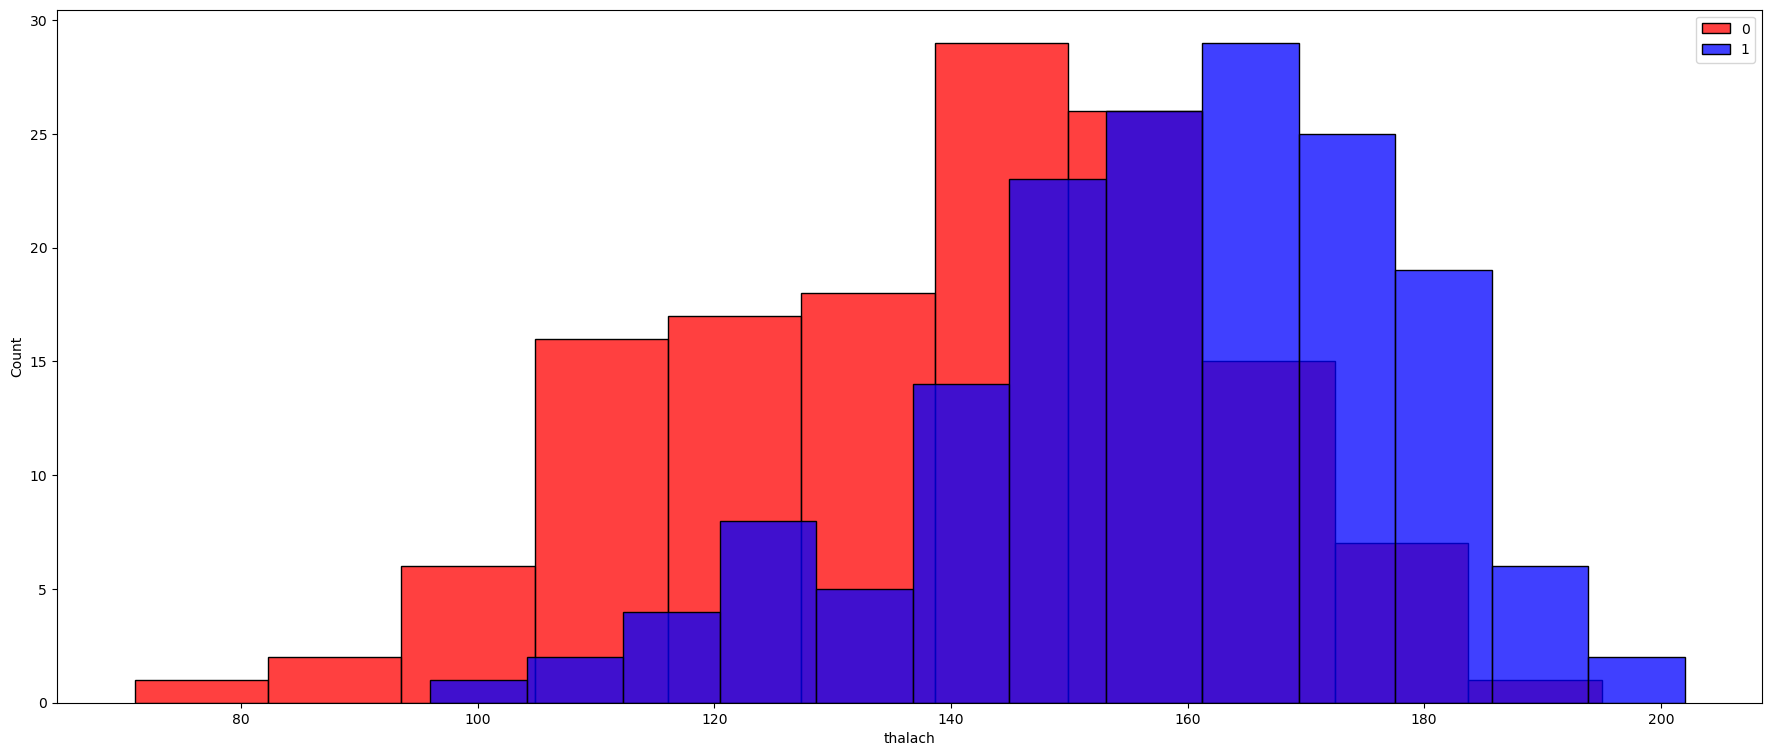

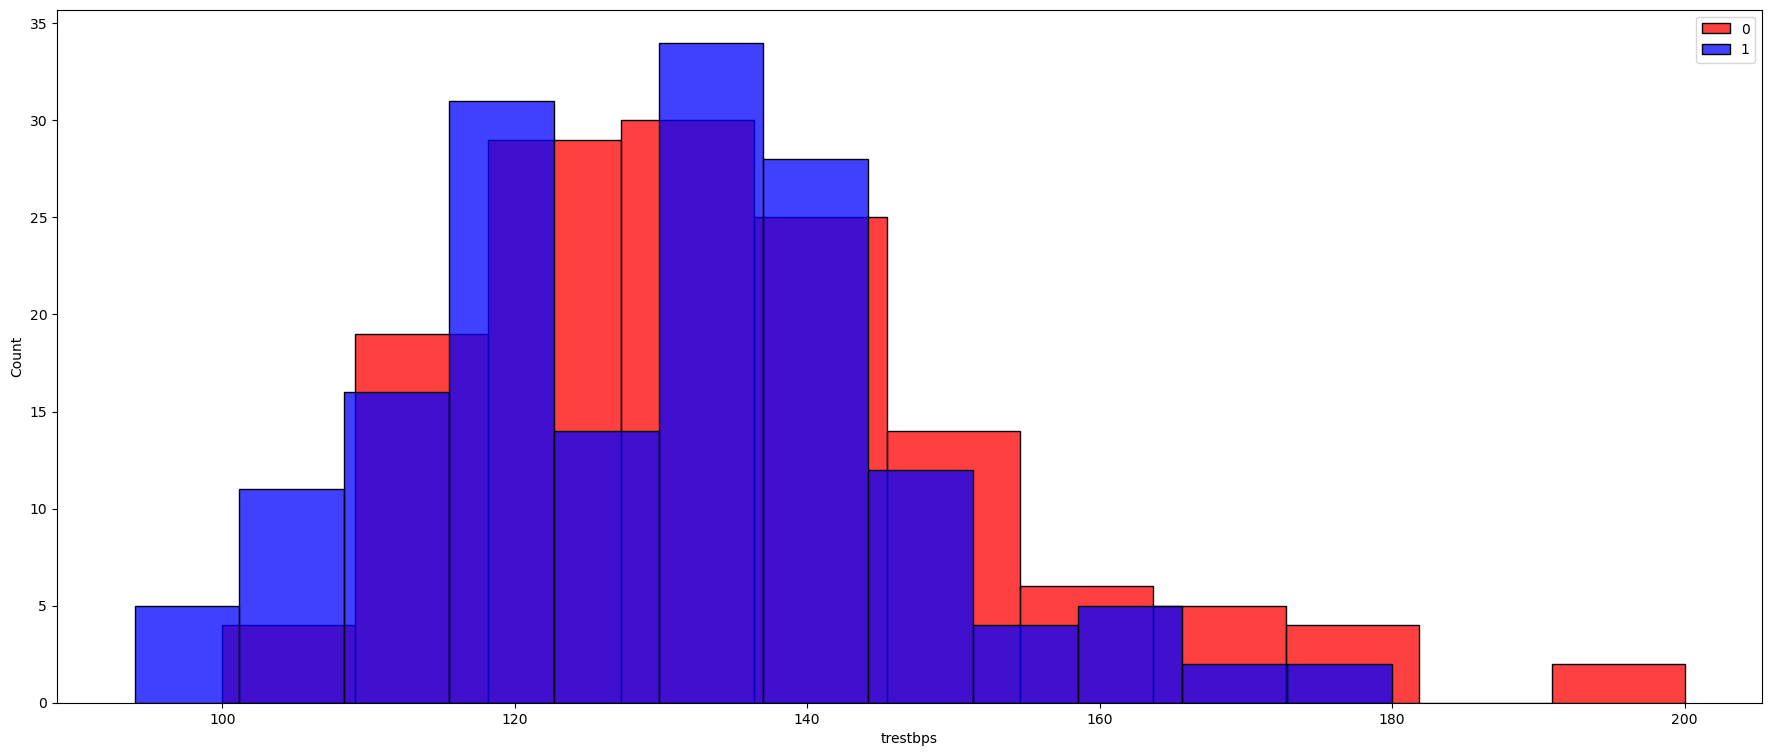

In [13]:
# Histograms for continuous features as per target
for feature in continuous_features:
    fig,axs = plt.subplots(figsize=(22,9))
    sns.histplot(df[df['target']==0][feature],color = 'red')
    sns.histplot(df[df['target']==1][feature],color = 'blue')
    
    plt.legend([0,1],loc='upper right')
    plt.show()

- Here for every feature there is no such significant relation of patient with heart diesease and without. So we can use Statistical Methods to get the result.

Ttest_indResult(statistic=3.9337655411101426, pvalue=0.00010394837285416688)

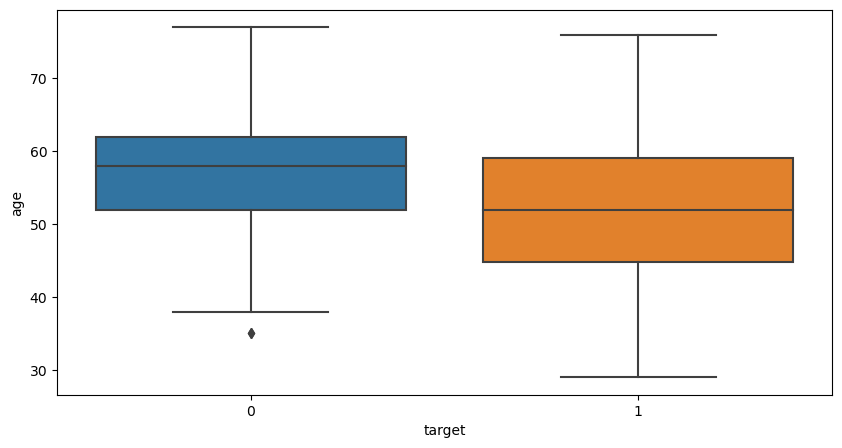

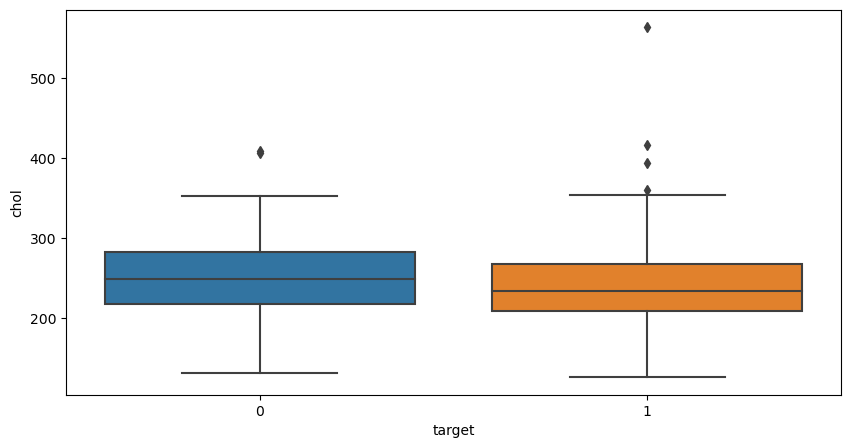

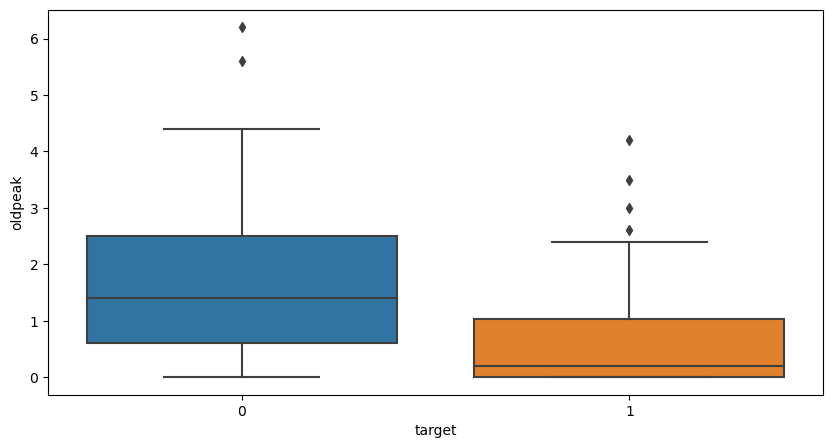

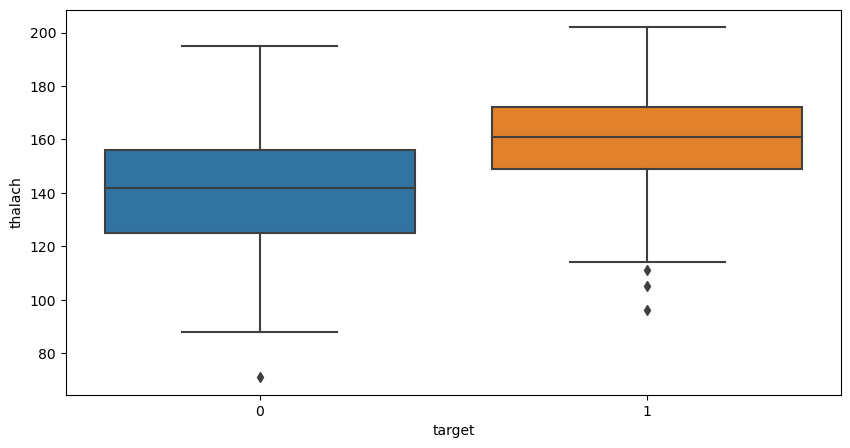

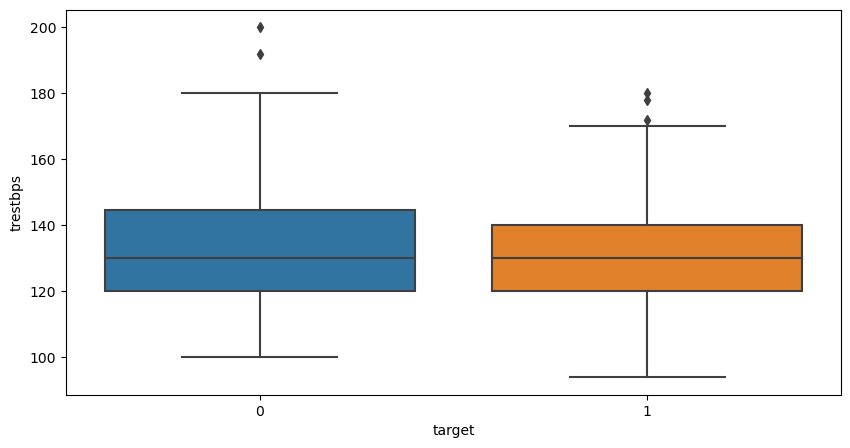

In [14]:
# Boxplot of continuous features
for i in range(len(continuous_features)):
    feature = continuous_features[i]
    plt.figure(figsize = (10, 5))
    sns.boxplot(x='target',y=continuous_features[i],data=df);

import scipy.stats as stats


stats.ttest_ind(df['age'][df['target'] == 0],
                df['age'][df['target'] == 1])

In [15]:
# Now as per box plot we see that for some features have quiet a bit variation in mean for target of 0 and 1 
# But to compare the means of both stage we need perform statistical test.

# Here by we have performed T-test to compare the mean

for feature in continuous_features:
    print('---------------------------------')
    print('T-Test for::',feature)
    
    statt,p=stats.ttest_ind(df[feature][df['target'] == 0],
                    df[feature][df['target'] == 1])
    
    if p<.05:
        result="Mean value of for both target Condition is different"  
    else:
        result="Mean value of for both target Condition is same"  
    print('--> P-value is',p,"\n-->",result,"\n")
    
    


---------------------------------
T-Test for:: age
--> P-value is 0.00010394837285416688 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: chol
--> P-value is 0.15803697464249714 
--> Mean value of for both target Condition is same 

---------------------------------
T-Test for:: oldpeak
--> P-value is 5.814566948031283e-15 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: thalach
--> P-value is 2.4761460479234722e-14 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: trestbps
--> P-value is 0.010926538861949147 
--> Mean value of for both target Condition is different 



- As per the result, we found that **age,oldpeak,thalach,trestbps** have different mean for target 0 and 1, which can also be seen from Boxplot.

- While for **chol** mean for target 0 and 1 is same

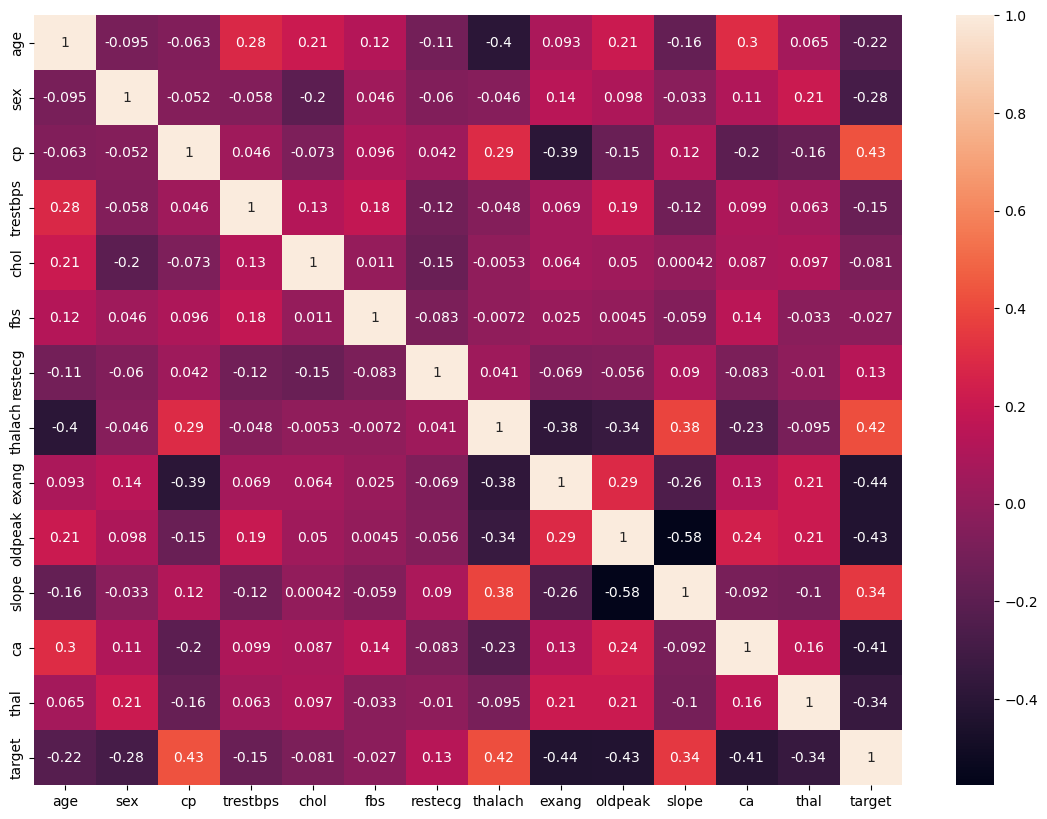

In [16]:
# Now that to determine how all of these features are interrelated let's plot the heatmap of correlation.
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot = True);

- Only **Slope and oldpeak** is having some what correlation but that also is not significant enough to remove anyone of those

In [17]:
# Create the list of categorical features for further use in prepare charts

categorical_features = list(set(df.columns) -set(continuous_features)-set(['target']))
categorical_features.sort()
categorical_features

['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']

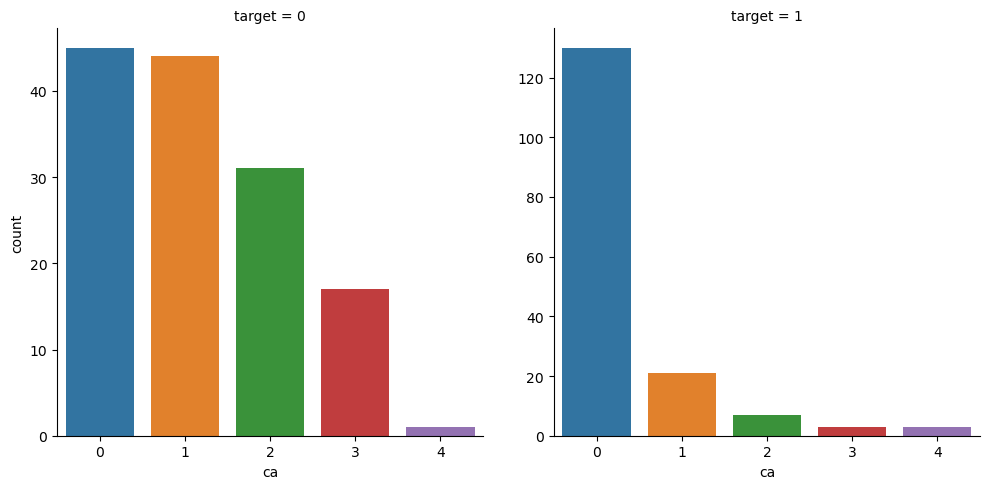

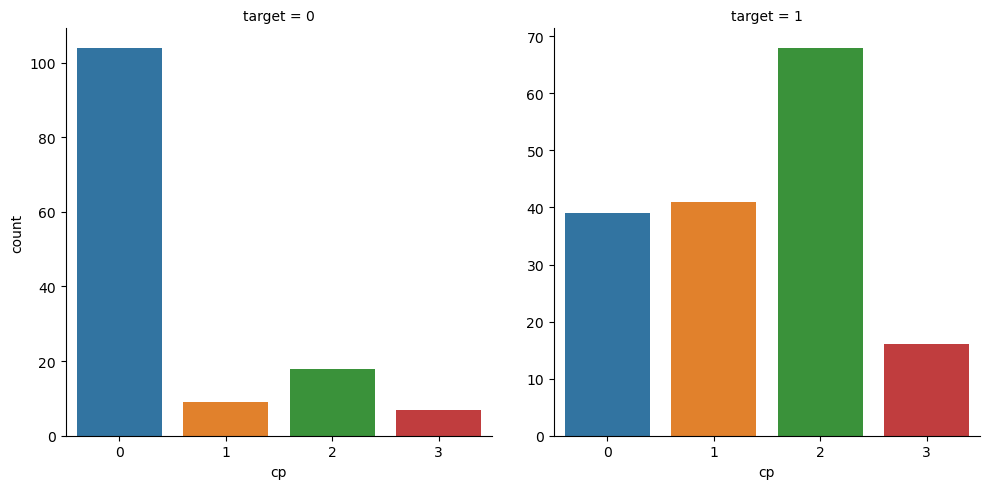

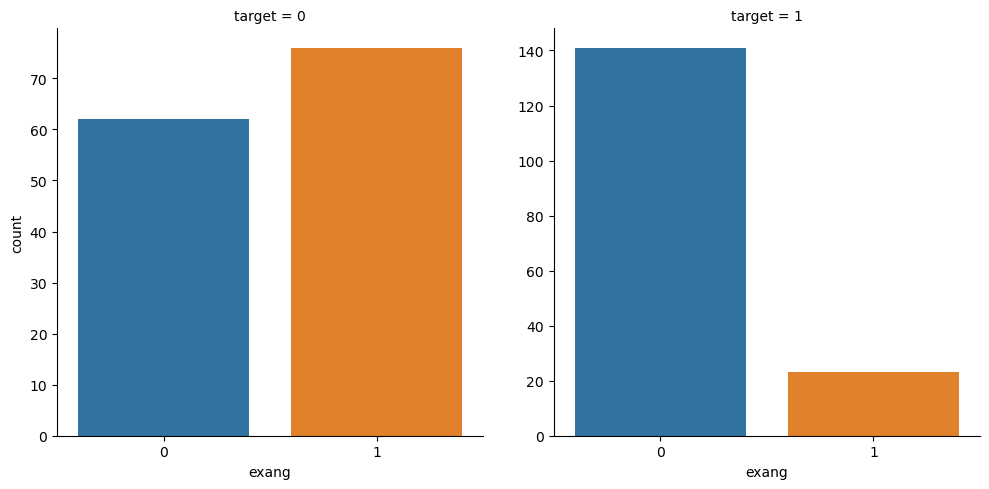

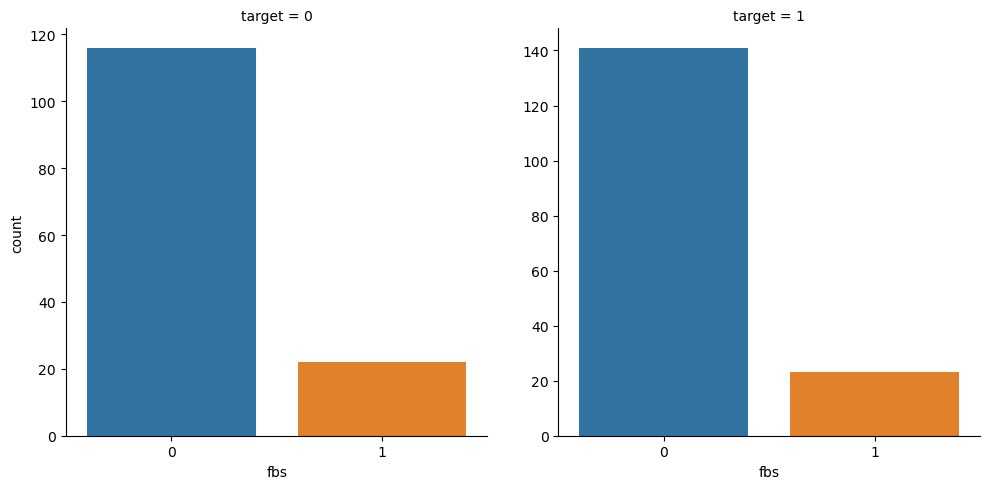

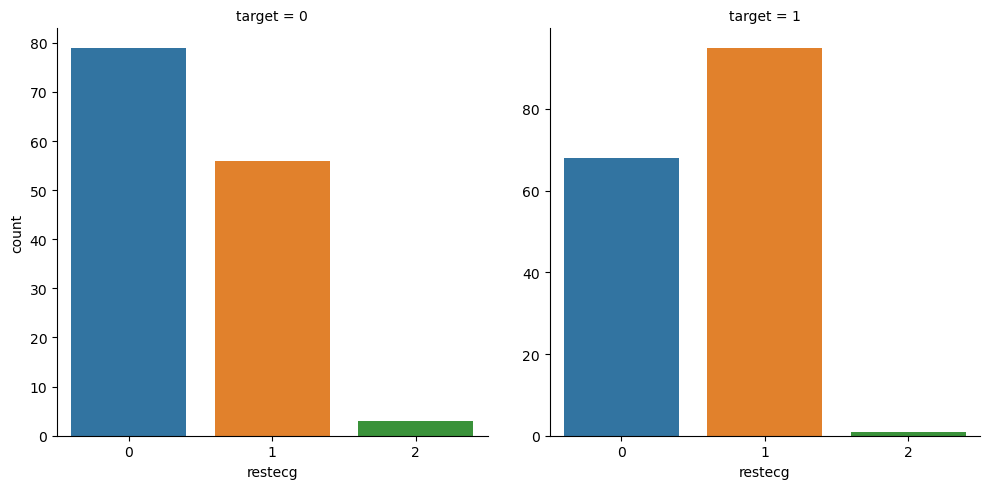

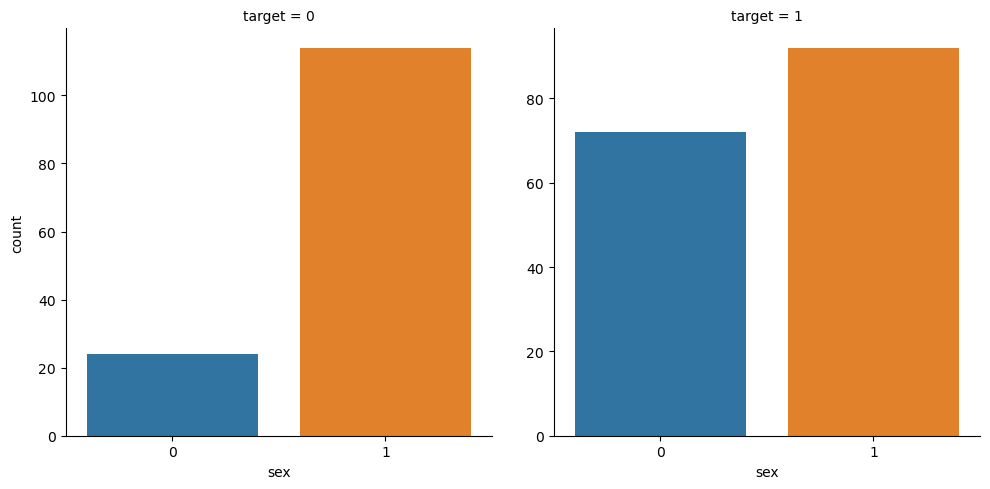

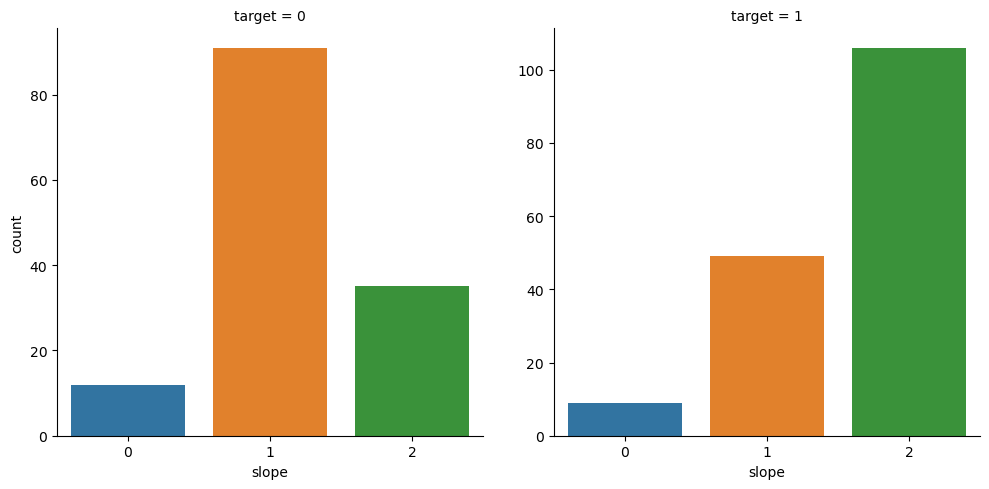

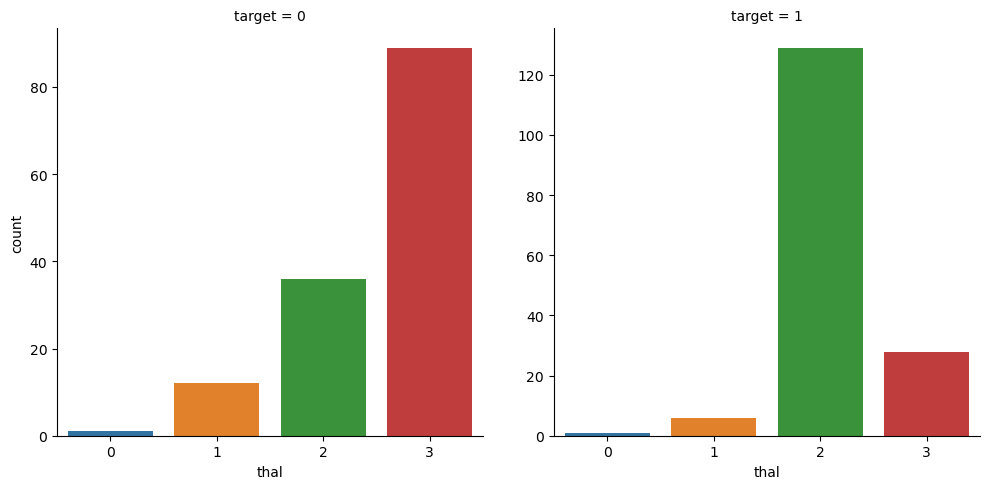

In [18]:
# Categorical plot of all categorical_features as per target values
for feature in categorical_features:
    g = sns.catplot(x=feature, col='target', kind='count', data=df, sharey=False)


- **ca** we can see that person having no major vessel colored has the higher chances of having heart diesease.
- **cp** here almost every type of chest pain has higher chances of having heart diesease but type **2** is the most dangerous one and we can say that type **0** is least dangerous.
- **exang** according to this we can see that a person with exang is less likely to have heart diesease.
- **fbs** Here in this there is no relation with heart diesease as for both case there are almost same result.
- **restcg** Here we can see that ecg result with category 2 are most likely with the heart diesease while category 3 is leat likely
- **sex** percentage of female having heart diesease is than not having though count of men are higher.
- **slope** with category 2 are most likely with heart diesease.
- **thal** with category 2 are most likely with heart diesease while category 3 is having least percentage.

- With this we are able to see that many categories of features have a larger impact on heart diesease, but to get the statistical significance of the Data we need to perform Statistical Test

In [19]:
# chi2 Test to get the significant association between variables means some categories might directly affect the prediction of heart diesease
# while some of it would have no impact at all.
from scipy.stats import chi2_contingency

for col in categorical_features:
    data_crosstab = pd.crosstab(df['target'], df[col],)
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        result="There is a significant association between these varibles "
    else:
        result="There is no association those varibles"
    print('--> P-value is',p,"\n-->",'chi2 value is',c,"\n-->",result,"\n")

ca        0   1   2   3  4
target                    
0        45  44  31  17  1
1       130  21   7   3  3 

--> P-value is 3.771038067427657e-15 
--> chi2 value is 73.68984583164412 
--> There is a significant association between these varibles  

cp        0   1   2   3
target                 
0       104   9  18   7
1        39  41  68  16 

--> P-value is 1.8926838351935918e-17 
--> chi2 value is 80.97876150785669 
--> There is a significant association between these varibles  

exang     0   1
target         
0        62  76
1       141  23 

--> P-value is 9.556466486179178e-14 
--> chi2 value is 55.45620298199192 
--> There is a significant association between these varibles  

fbs       0   1
target         
0       116  22
1       141  23 

--> P-value is 0.7611374700928197 
--> chi2 value is 0.09240835568001493 
--> There is no association those varibles 

restecg   0   1  2
target            
0        79  56  3
1        68  95  1 

--> P-value is 0.007713053269318978 
--> c

- As per the above result we found that **ca, cp, exang, restecg, sex, slope, thal** have significant association with the result, means these features are helpful in predict the heart diesease of the person, while **fbs** have no association in prediction of heart diesease so, we can remove the feature. 

- Here for now we won't remove **fbs** feature

# Outlier Analysis

- There might be many outliers which can affect the accuracy the model, so let's determine those.

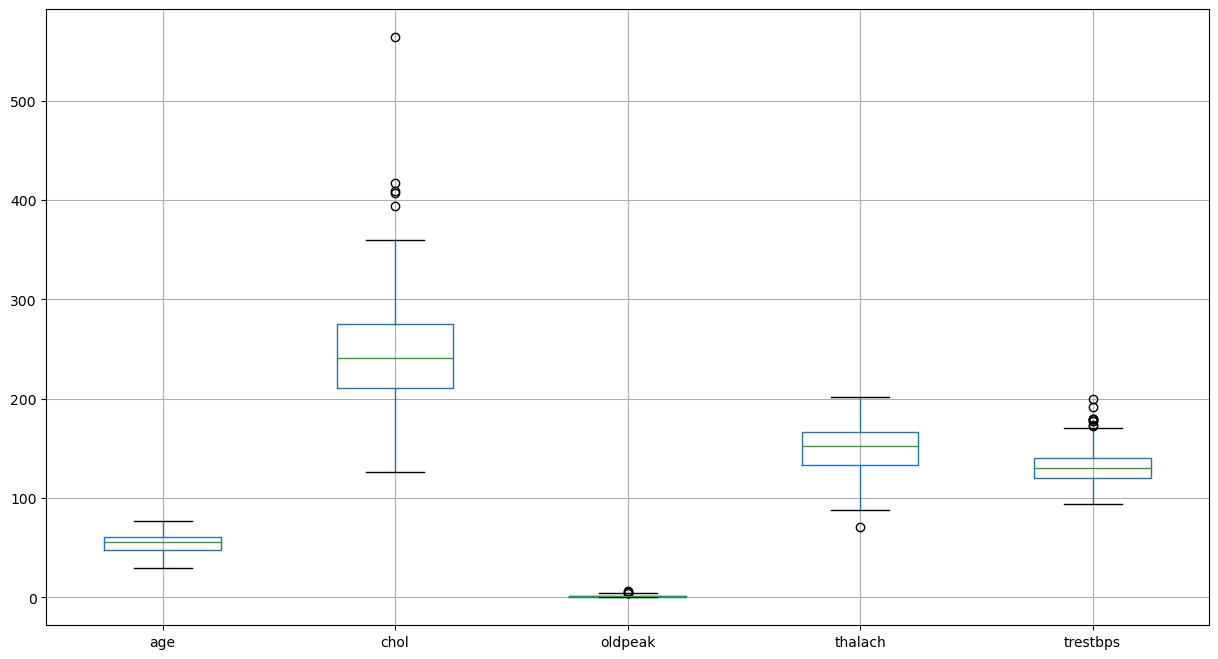

In [20]:
# plotting the boxplot to visualise the outliers
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_features))
plt.show()

- There seems quiet a few outliers in chol,trestbps so let's check it quantile method

In [21]:
# defining a function to check for the outliers in column considering limit quantiles as 25 and 75%
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [22]:
# using a for loop to count the percentage of outliers in every columns with continuous values

for col in continuous_features:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: age
Upper Limit = 80.5
Lower Limit = 28.5
Percentage of Outliers= 0.0
-------------------------------------------------- 

--------------------------------------------------
Column: chol
Upper Limit = 370.375
Lower Limit = 115.375
Percentage of Outliers= 1.6556291390728477
-------------------------------------------------- 

--------------------------------------------------
Column: oldpeak
Upper Limit = 4.0
Lower Limit = -2.4000000000000004
Percentage of Outliers= 1.6556291390728477
-------------------------------------------------- 

--------------------------------------------------
Column: thalach
Upper Limit = 215.125
Lower Limit = 84.125
Percentage of Outliers= 0.33112582781456956
-------------------------------------------------- 

--------------------------------------------------
Column: trestbps
Upper Limit = 170.0
Lower Limit = 90.0
Percentage of Outliers= 2.980132450331126
-------------------------------------------

- Here Percentage of outlier in each feature is very low so we can deifinitely delete the rows

In [23]:
#dropping records for BMI and SleepTime outliers
for col in ['age', 'chol','oldpeak','thalach','trestbps']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['age', 'chol','oldpeak','thalach','trestbps'], inplace=True)
df.reset_index(drop=True, inplace=True)


# Standardization

- Let's perform Standardization to transform the data in similar unit 

In [24]:
# we willcopy the original dataframe and perform task in new dataframe
df1 = df.copy()

In [25]:
# We will use Standard Scaler and scale the continuous features
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = list(continuous_features)
df1[cols] = std_scaler.fit_transform(df1[cols])

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.982275,1,3,0.984117,-0.208961,1,0,0.001716,0,1.315709,0,0,1,1
1,-1.871092,1,2,0.007591,0.172417,0,1,1.635162,0,2.486915,0,0,2,1
2,-1.432112,0,1,0.007591,-0.859547,0,0,0.972954,0,0.437305,2,0,2,1
3,0.214061,1,1,-0.643426,-0.141659,0,1,1.237837,0,-0.148297,2,0,2,1
4,0.323805,0,0,-0.643426,2.505551,0,1,0.575629,1,-0.343498,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.323805,0,0,0.658608,-0.029489,0,1,-1.190258,1,-0.733900,1,0,3,0
279,-0.993133,1,3,-1.294442,0.486493,0,1,-0.792933,0,0.242104,1,0,3,0
280,1.530999,1,0,0.919015,-1.106321,1,1,-0.395609,0,2.389314,1,2,3,0
281,0.323805,1,0,0.007591,-2.497228,0,1,-1.543436,1,0.242104,1,1,3,0


# Train Test Split

- Now that we have scaled the data it's time for splitting.
- Split the data into X and y and then into train and test

In [26]:
# import train test split library and prepare X nad y 
from sklearn.model_selection import train_test_split

In [27]:
X = df1.drop(columns = 'target',axis=1)
y = df1['target']

In [28]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# PCA

<AxesSubplot:title={'center':'Correlation with Target'}>

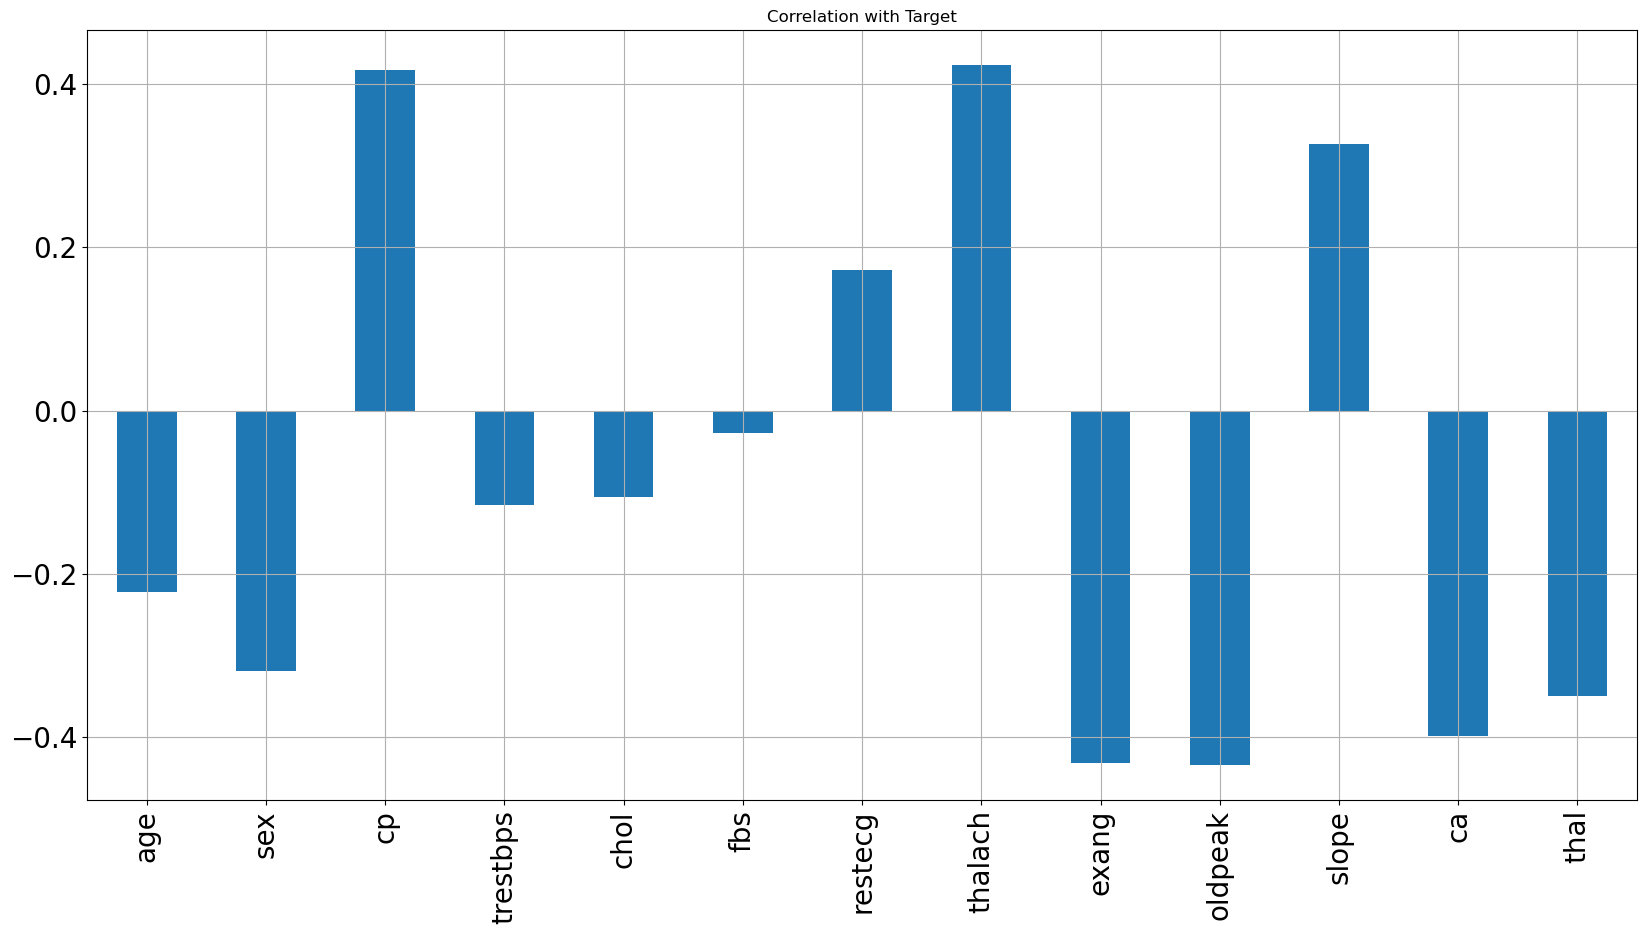

In [29]:
# Before proceeding for PCA lets check the correlation of features with target variable so that we can determine multicolinearity.
X=df1.drop(['target'],axis=1)
X.corrwith(df1['target']).plot.bar(
 figsize = (20, 10), title = "Correlation with Target", fontsize = 20,
 rot = 90, grid = True)

- From the above plot we can see that **chol,trestbps,fbs,restecg** are having very less correlation with heart diesease

In [30]:
# Let's perform PCA to tackle the curse of Dimensionality!!!

# importing library for PCA from sklearn
from sklearn.decomposition import PCA

# create an object of PCA and fit it with scaled Data
pca = PCA()
X_pca = pca.fit(X)

# Now lets determine the variance percentage of every PCA components which can help to reduce the dimensionality 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 25.7,  40.4,  53. ,  63. ,  71.6,  80.1,  85.5,  89.6,  92.6,
        95.1,  97.1,  98.7, 100. ])

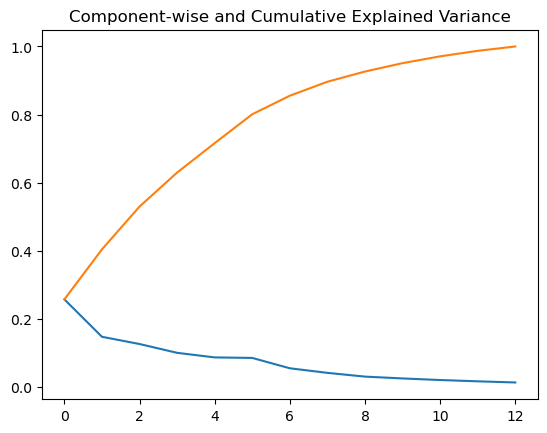

In [31]:
# Visualising the contribution of every component.

plt.plot(range(13), pca.explained_variance_ratio_)
plt.plot(range(13), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance");

In [32]:
# store the variance value to prepare bar plot
exp_var_pca = pca.explained_variance_ratio_

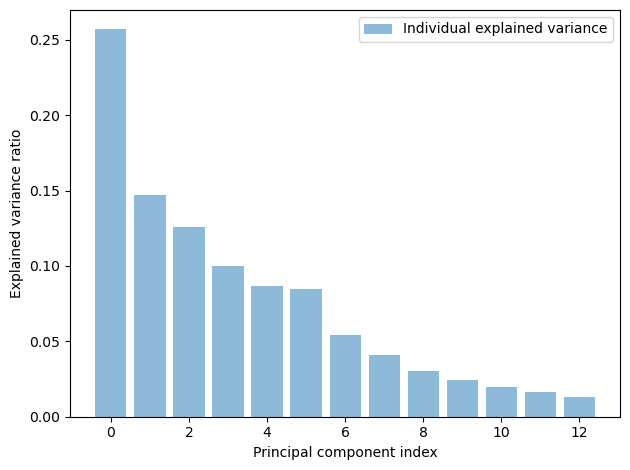

In [33]:
# Now to visualize the variance of each component we will prepare bar plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- From it is clearly visible that PCA components from 10 are having very less variance compared to others.

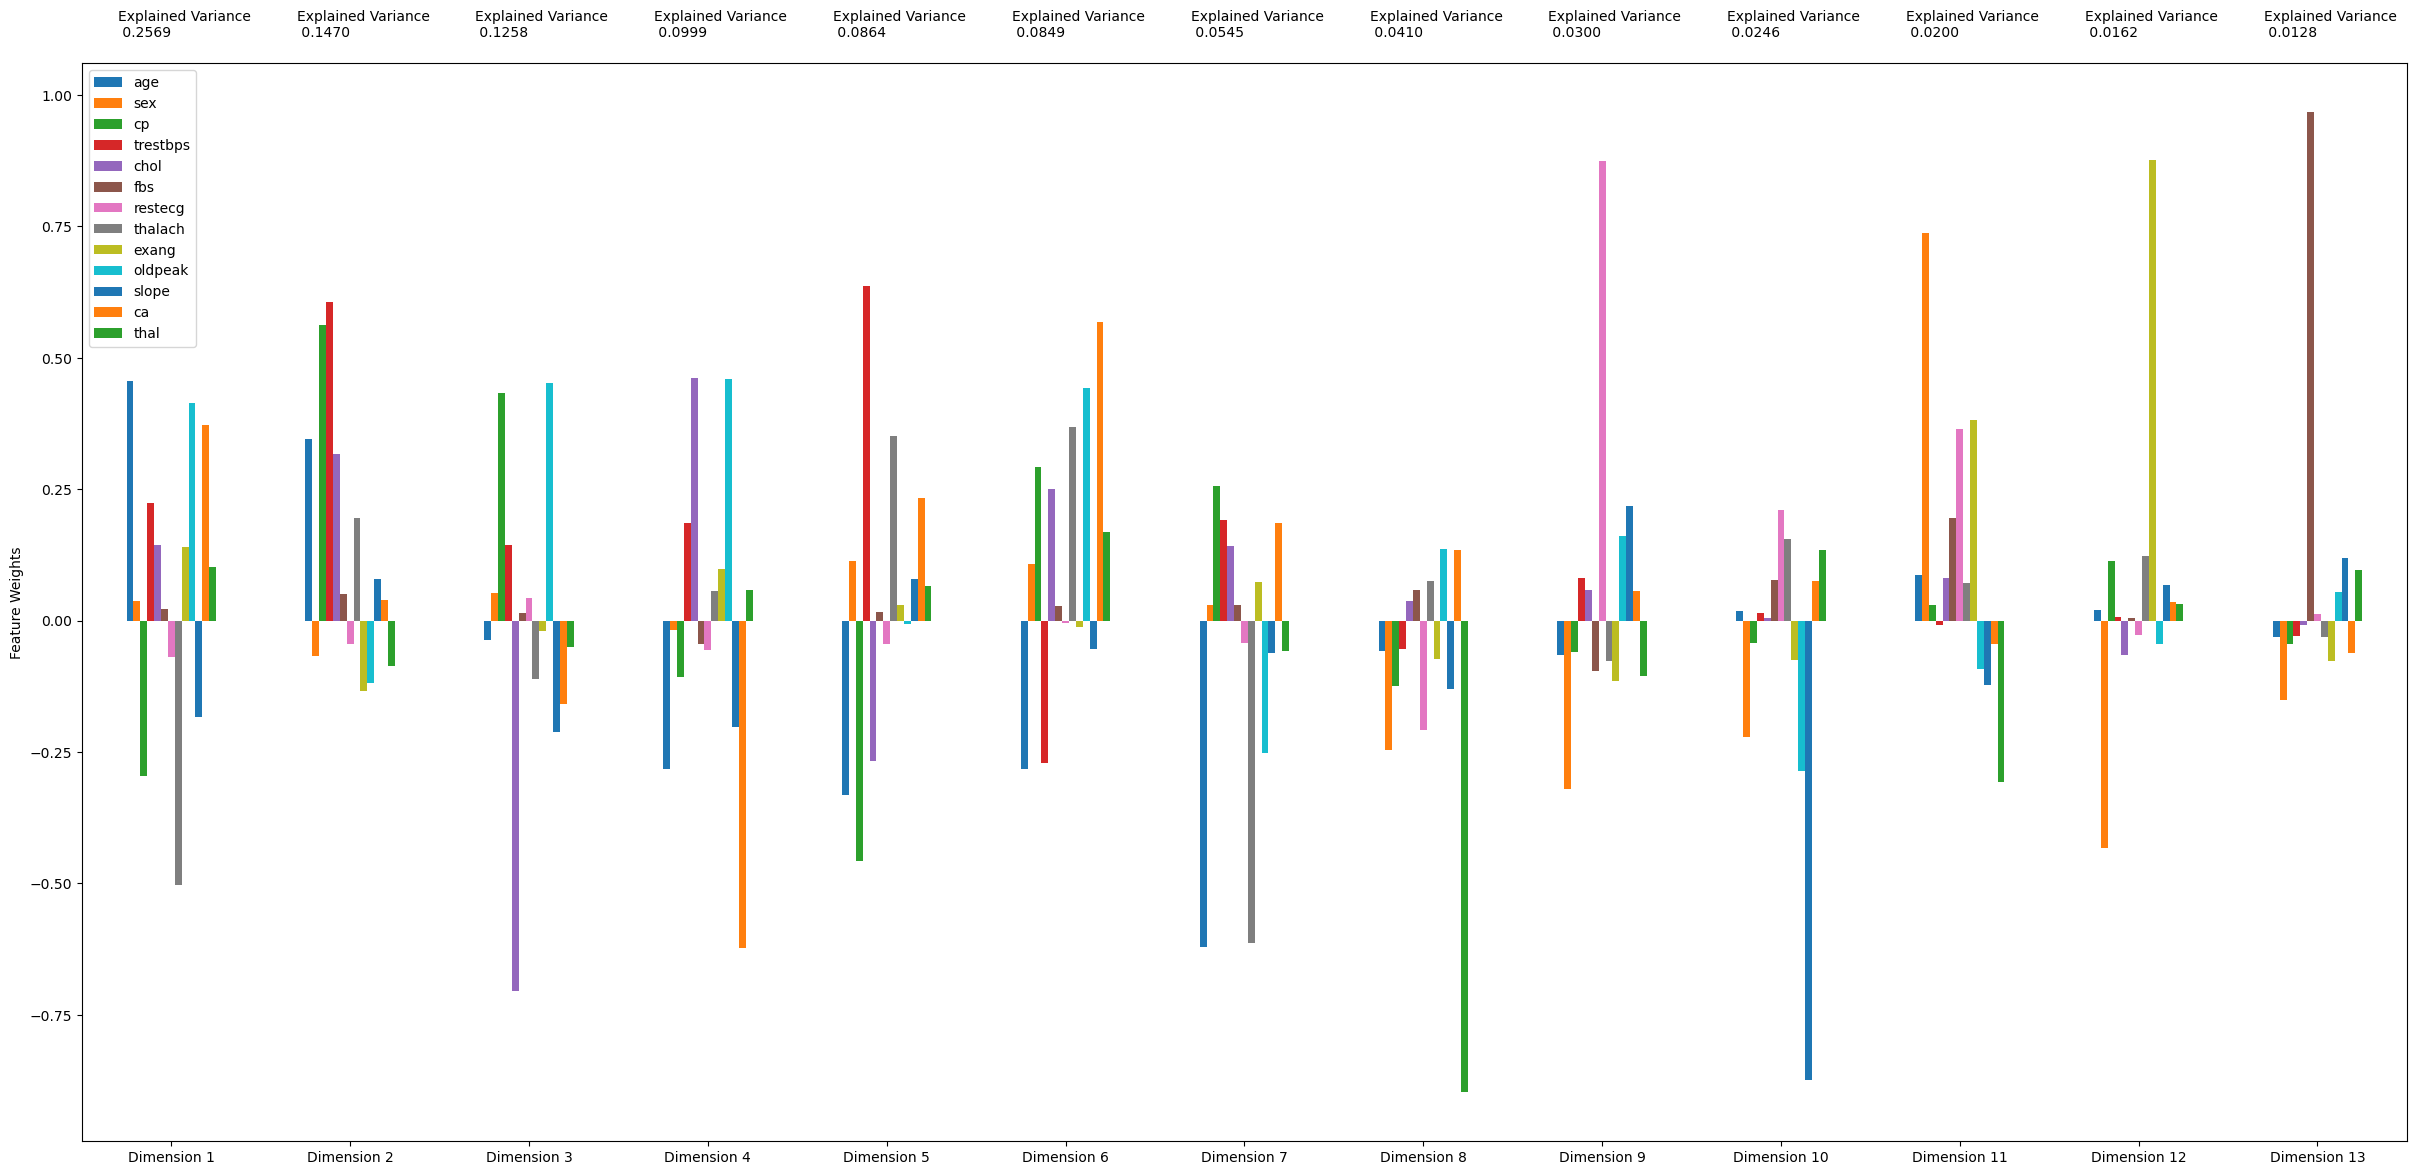

In [34]:
# Now that we have got that PCA components from 1-10 are contributing good to the result, lets check how this PCA components are built of.
# For that we will create a function that will plot the weight of every feature of PCA components.

# through which we can get the insights of importance of columns for target variable.

def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
        
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
        
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (30,14))
        
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
        
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.30, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
        
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)
pca_results = pca_results(X, pca)

# Conclusion

- Here by we got that **PCA1** has the highest variance % of more than **25%** While PCA from 10-13 are having variance of less than 5% means, they all are almost constant so, it may not be contributing much to the output of the result.

- So we can remove those PCA and reduce the dimensionality of model!!

- Also, From the Final plot we got that only **sex,fbs,restecg,thal,exang** are the features which are very less contributing to the final output. That is the reason in **PCA10,PCA11,PCA12,PCA13** Tthose were having highest weightage and thus PCA's were having least variance.